## preparing

### import the package 

In [146]:
import pandas as pd #
import numpy as np # 
import  matplotlib.pyplot as plt

In [147]:
alpha=.85/3; #capital
#beta=.85/3; #energy
gamma=.85/3*2; #labor
beta_dis=0.96; # the discount factor
delta=0.08;  #depreciation rate
nu=1.0; #energy price
S=1; #scale 

### Consumer's optimal choice

In [148]:
r=1/beta_dis-(1-delta)
R=r-delta

### read in the firms' employees data

In [149]:
# If the text file is delimited by tabs
firms_data=pd.read_csv('establishment_dist.txt', delimiter = '\t',header=None).rename(columns={0:"firms_size",1:"firms_proportion"})
#firms_data

### construting the theoretical cumulative distribution of the firm's employees size

#### empirical distribution

In [150]:
ns = 100  # number of the firm's productivity grid
ndata = firms_data.shape[0]  # number of the firm's size data
s_max = firms_data["firms_size"][ndata-1]**(1-gamma-alpha)  # z_ns represents the upper bound of firm's productivity
s_grid = np.logspace(0, np.log10(s_max), ns)  # why log10? Ans： easier to plot the log10 view and creating the grid
n_grid = s_grid**(1/(1-gamma-alpha))  # mapping the productivity grid to the numbers of employees
theo_hs = np.zeros(ns)
s_grid

array([1.        , 1.01405289, 1.02830326, 1.04275389, 1.05740759,
       1.07226722, 1.08733567, 1.10261588, 1.11811082, 1.1338235 ,
       1.149757  , 1.1659144 , 1.18229887, 1.19891358, 1.21576178,
       1.23284674, 1.2501718 , 1.26774032, 1.28555573, 1.3036215 ,
       1.32194115, 1.34051824, 1.35935639, 1.37845927, 1.39783061,
       1.41747416, 1.43739377, 1.4575933 , 1.4780767 , 1.49884794,
       1.51991108, 1.54127022, 1.56292952, 1.58489319, 1.60716552,
       1.62975083, 1.65265354, 1.67587809, 1.69942902, 1.72331091,
       1.7475284 , 1.77208622, 1.79698915, 1.82224203, 1.8478498 ,
       1.87381742, 1.90014997, 1.92685256, 1.9539304 , 1.98138877,
       2.009233  , 2.03746853, 2.06610084, 2.09513553, 2.12457823,
       2.15443469, 2.18471072, 2.21541221, 2.24654515, 2.2781156 ,
       2.3101297 , 2.34259369, 2.3755139 , 2.40889673, 2.44274868,
       2.47707636, 2.51188643, 2.54718569, 2.582981  , 2.61927934,
       2.65608778, 2.69341349, 2.73126372, 2.76964586, 2.80856

### adding a extra [0,0] row to complete the dist
do this part once

In [151]:
# Assuming df is your DataFrame and new_row is a dictionary where the keys are 
#column names and the values are the data for the new row
new_row=[0,0]
firms_data.loc[-1] = new_row
firms_data.index = firms_data.index + 1  # shifting index
firms_data= firms_data.sort_index()  # sorting by index
cum_sum_firms_data = np.cumsum(firms_data)

In [152]:
for i in range(1, len(firms_data)):
    #print(i)
    I = np.where((n_grid <= firms_data["firms_size"][i]) & (n_grid > firms_data["firms_size"][i-1]))[0]
    #print(I)
    theo_hs[I] = firms_data["firms_proportion"][i] / len(I)
theo_firm_size_dist=pd.DataFrame(theo_hs).rename(columns={0:"firms_proportion"})
theo_firm_size_dist.index.rename("firms_size",inplace=True)
theo_firm_size_dist

C:\Users\johan\AppData\Local\Temp\ipykernel_8108\1021378504.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  theo_hs[I] = firms_data["firms_proportion"][i] / len(I)


,firms_proportion
firms_size,
0,0.032157
1,0.032157
2,0.032157
3,0.032157
4,0.032157
...,...
95,0.000007
96,0.000007
97,0.000007


C:\Users\johan\AppData\Local\Temp\ipykernel_8108\2274218911.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.axis([0, 14000, 0, 1.1])


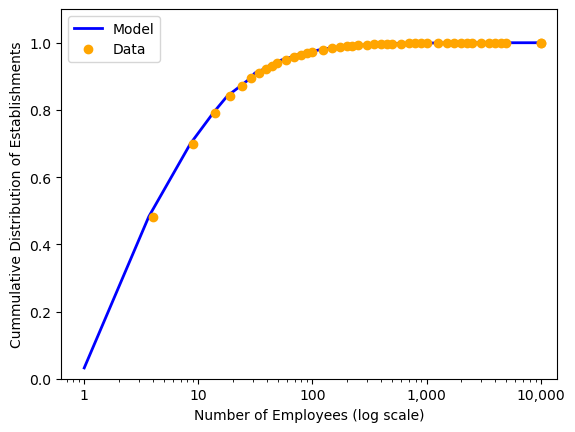

In [153]:
import matplotlib.pyplot as plt
import numpy as np

fig = 1
if fig == 1:
    plt.figure()
    plt.semilogx(n_grid, np.cumsum(theo_firm_size_dist["firms_proportion"]), '-',color="blue",linewidth=2)
    plt.semilogx(firms_data["firms_size"], cum_sum_firms_data, 'o', color="orange")
    plt.xticks([1, 10, 100, 1000, 10000], ['1', '10', '100', '1,000', '10,000'])
    plt.xlabel('Number of Employees (log scale)')
    plt.ylabel('Cummulative Distribution of Establishments')
    plt.legend(['Model', 'Data'], loc='upper left')
    plt.axis([0, 14000, 0, 1.1])
    plt.show()

# benchmark model

In [154]:
ntau=3;# number of different tax(capital,labor and the total output)
# Assume constant separation rates across plants: lambda (if separation
# rate depends on s need to create a matrix rho)
cf=0; # the fuxed cost of the production
ce=1; # the entrance cost to enter the market
lambda_exit =0.10; # the exit rate to get out of the market
rho=(1-lambda_exit)/(1+R);  # the discount factor to discount the steady state welfare

### without taxation and subsidy

In [155]:
p = np.vstack((np.zeros(ns), np.ones(ns), np.zeros(ns))).T #300*3
hsmatrix = np.outer(theo_firm_size_dist, np.ones(ntau)) 
g = hsmatrix*p  #hs 100*3 ; p 100*3  elementwise multiplication  (s,tau)
smatrix = np.outer(S*s_grid, np.ones(ntau))
taus = 0.0 #the subsidy
tau = 0.0 #the tax
#In the benchmark case, the subsidy and the tax are equal to zero.
tauv = np.array([-taus, 0, tau])
mtau = np.outer(np.ones(ns), tauv)
mtauo = mtau
mtauk = np.zeros((ns, ntau)) #tax on capital
mtaun = np.zeros((ns, ntau)) #tax on labor
#mtaue = np.zeros((ns, ntau)) #tax on energy

### bisection on equilibrium wage

#### the initial guess

In [156]:

import numpy as np
from We_function import We_function
w_0=1.0 
Output0=We_function(w_0,r, smatrix, alpha, gamma, mtauk, mtaun, mtauo, rho, g, ce, cf, ns, ntau)
We0=Output0[0]
print(We0)
# the output sequence of the function We 
# We,k_bar,n_bar,pi_bar,W,xbar,
w_1=1.5;
Output1=We_function(w_1,r, smatrix, alpha, gamma, mtauk, mtaun, mtauo, rho, g, ce, cf, ns, ntau)
We1=Output1[0]


10.199953583859871


#### verifying whether the initial guess is good to go

In [157]:
while We0 * We1 > 0:
    if We0 < 0:
        w_0 = w_0 * 0.5
        Output0 = We_function(w_0,r, smatrix, alpha, gamma, mtauk, mtaun, mtauo, rho, g, ce, cf, ns, ntau)
        We0=Output0[0]
    if We1 > 0:
        w_1 = w_1 * 1.5
        Output1 = We_function(w_1,r, smatrix, alpha, gamma, mtauk, mtaun, mtauo, rho, g, ce, cf, ns, ntau)
        We1=Output1[0]


#### the bisection part

In [158]:
# the actual Bisection part
iconv2 = 0
tol2 = 0.0000001
maxit2 = 100
it2 = 1
while iconv2 == 0 and it2 <= maxit2:
    w = (w_0 + w_1) / 2
    Output = We_function(w,r, smatrix, alpha, gamma, mtauk, mtaun, mtauo, rho, g, ce, cf, ns, ntau)
    We=Output[0]
    if abs(We) < tol2:
        iconv2 = 1
        print('wage has converged in', it2)
    else:
        if We * We1 > 0:
            w_1 = w
        else:
            w_0 = w
        it2 = it2 + 1

if it2 >= maxit2:
    print('Warning: Zero profit condition not satisfied')

wage has converged in 23


In [159]:
w

1.895543247461319

#### decode the Output

In [160]:
# the output sequence of the function We 
# We,k_bar,n_bar,pi_bar,W,xbar,
We=Output[0]
k_bar=Output[1] # optimal capital
n_bar=Output[2] 
pi_bar=Output[3]
W=Output[4]
xbar=Output[5]

### aggregate output

In [161]:
# Compute the normalized invariant distribution of plants.
muhat = 1 / lambda_exit * xbar * g

# Find mass of entry that clears the labor market.
N_hat = np.sum(n_bar * muhat) 
# since here multiply the muhat, We still need to multiply by the E to get the total labor
# N*E represents the total number of workers in the economy
E = 1 / N_hat
mu = muhat * E
mu_s = np.sum(mu, axis=1) # Note sum(.,2) sums over rows #100*1

# Compute aggregate statistics.
Y = np.sum(smatrix * k_bar**alpha * n_bar**gamma * mu)
K = np.sum(k_bar * mu)
KY = K / Y
Kbe = K
Y

3.3450763190493875

In [162]:
A = Y / (N_hat * E) / (K / (N_hat * E)) ** alpha
# Total factor of the production(TFP)
# The production is DRS, but here assumes the CRS in the calculation of the TFP

M = np.sum(mu)  # mass of plants producing
sgdp=np.sum(-mtauo*smatrix*(k_bar)**alpha*(n_bar)**gamma*mu-mtauk*r*k_bar*mu-mtaun*w*n_bar*mu)/Y
sgdp

0.0

In [163]:
# Average employment per plant (AEPP)
normalization_emp = n_bar[0, 2]
# let the optimal employee number of the lowest productivity plant with no tax to be 1
rnbar = n_bar / normalization_emp
AEPP = 1 / (M * normalization_emp)
# since the total labor supply is 1 and the total numbers of the operating firms is M,
# so 1/M is the average number of employee. Finally, divided by the normalization factor.

# Distribution and plant statistics
relmus = np.sum(mu, axis=1) / M #100*1
# Recall M = np.sum(np.sum(mu))
sK = (k_bar * mu) / K
sN = (n_bar * mu) / (N_hat * E)
sY = (smatrix * k_bar**alpha * n_bar**gamma * mu) / Y
AEPP


17.582601483620603

In [164]:
print("Diego Restuccia and Richard Rogerson(2008) Benchmark without energy inputs\n")
print("Y:",Y,"\n")
print("K:",K,"\n")
print("A:",A,"\n")
print("E:",E,"\n")
print("M:",M,"\n")

Diego Restuccia and Richard Rogerson(2008) Benchmark without energy inputs

Y: 3.3450763190493875 

K: 7.789903756690352 

A: 1.8698435533806295 

E: 0.36894221350522405 

M: 3.689368282033104 



In [165]:
ntax=5 # Number of experiments: tau=0,0.1,0.2,0.3,0.4.

# Assuming rnbar, sN, and mu are predefined numpy arrays
modeln = rnbar[:, 1]  # number of workers with lowest s in BE norm to 1
I = np.argsort(rnbar, axis=None)
modelnp = np.zeros((ns * ntau, ntax))
modelnp[I,0] = rnbar.flatten()[I]
modelsNp = np.zeros((ns * ntau, ntax))
modelsNp[I,0] = sN.flatten()[I]
modelmup = np.zeros((ns * ntau, ntax))
modelmup[I,0] = mu.flatten()[I] / np.sum(mu)
modelmu = mu[:, 1] / np.sum(mu[:, 1])  # prob dist of plants
modelsN = sN[:, 1]

### Initialize matrices for printing

In [166]:
Yp = np.zeros((1, ntax))
Kp = np.zeros((1, ntax))
KYp = np.zeros((1, ntax))
Ap = np.zeros((1, ntax))
Ep = np.zeros((1, ntax))
Mp = np.zeros((1, ntax))
wp = np.zeros((1, ntax))
sgdpp = np.zeros((1, ntax))
tausp = np.zeros((1, ntax))
SYp = np.zeros((1, ntax))
relmup = np.zeros((ns, ntax * ntau))
relmusp = np.zeros((ns, ntax))
sKp = np.zeros((ns, ntax * ntau))
sNp = np.zeros((ns, ntax * ntau))
sYp = np.zeros((ns, ntax * ntau))
kbarp = np.zeros((ns, ntax * ntau))
nbarp = np.zeros((ns, ntax * ntau))
xbarp = np.zeros((ns, ntax * ntau))
AEPPp = np.zeros((1, ntax))
KsKp = np.zeros((1, ntax))


In [167]:
Yp[0, 0] = Y  # save the benchmark result in the first index in the Yp vector.
Kp[0, 0] = K
KYp[0, 0] = KY
Mp[0, 0] = M
Ap[0, 0] = A
Ep[0, 0] = E
wp[0, 0] = w
sgdpp[0, 0] = sgdp
AEPPp[0, 0] = AEPP
relmusp[:, 0] = relmus


### ploting

In [168]:
I5 = np.where(modeln < 5)  # plants with less than 5 workers
I50 = np.where((modeln >= 5) & (modeln < 50))  # plants with 5 to less than 50 workers
Irest = np.where(modeln >= 50)  # plants with 50 workers or more
dis_plants = np.zeros((3, ntax))
dis_plants[0, 0] = np.sum(modelmu[I5])
dis_plants[1, 0] = np.sum(modelmu[I50])
dis_plants[2, 0] = np.sum(modelmu[Irest])
dis_sN = np.zeros((3, ntax))
dis_sN[0, 0] = np.sum(modelsN[I5])
dis_sN[1, 0] = np.sum(modelsN[I50])
dis_sN[2, 0] = np.sum(modelsN[Irest])

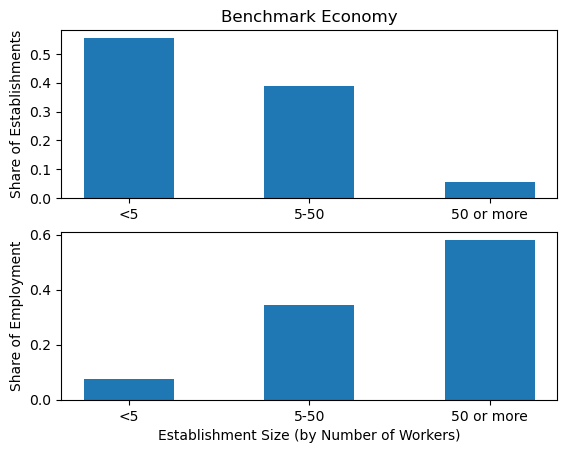

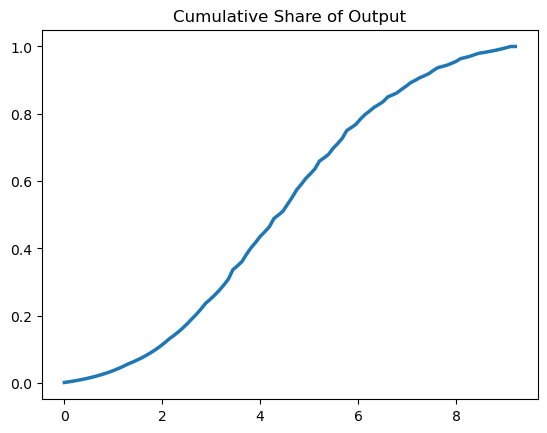

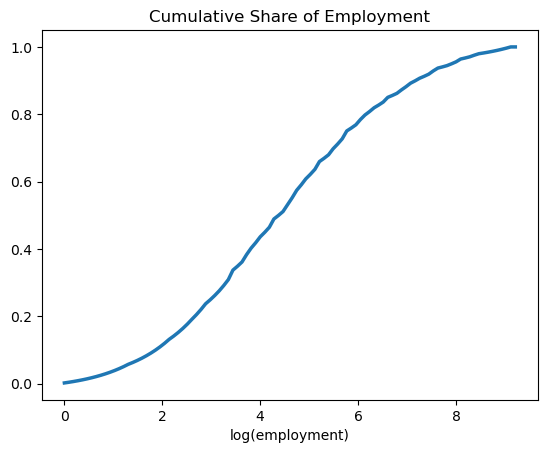

In [169]:
import numpy as np
import matplotlib.pyplot as plt
fig = 1
if fig == 1:
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.bar(['<5', '5-50', '50 or more'], dis_plants[:, 0], width=0.5)
    plt.title('Benchmark Economy')
    plt.ylabel('Share of Establishments')
    plt.subplot(2, 1, 2)
    plt.bar(['<5', '5-50', '50 or more'], dis_sN[:, 0], width=0.5)
    plt.xlabel('Establishment Size (by Number of Workers)')
    plt.ylabel('Share of Employment')

    plt.figure()
    plt.plot(np.log(n_grid), np.cumsum(sY[:, 1]), '-', linewidth=2.5)
    plt.title('Cumulative Share of Output')

    plt.figure()
    plt.plot(np.log(n_grid), np.cumsum(sN[:, 1]), linewidth=2.5)
    plt.title('Cumulative Share of Employment')
    plt.xlabel('log(employment)')

plt.show()


# the distorted economy

## find the equilibrium

In [170]:
from sub_We_function import Sub_We_function
from We_function import We_function
Output=Sub_We_function(taus,alpha, gamma, g, Kbe, lambda_exit, mtau, mtauo, mtauk, mtaun, ns, ntau, S, s_grid, smatrix, tau, rho, ce, cf, r)
# resid, k_bar, n_bar, xbar, E, N, mu, w, Y
# the sequence of the output_temp
# decode the result
resid, k_bar, n_bar, xbar, E, N, mu, w,Y =Output[0],Output[1],Output[2],Output[3],Output[4],Output[5],Output[6],Output[7],Output[8]



In [171]:
from sub_We_function import Sub_We_function
from We_function import We_function
type = 2
indtaus = 1  # Set to 0 if tax only experiments (NOTE: also set sub=0)

# Mass of distorted and undistorted plants. Note: nosub=sub=1/3 is the
# uniform case and must have nsub+sub<=1.
nosub = 0.0
sub = 0.5

taup = [0.0, 0.1, 0.2, 0.3, 0.4]

for tax in range(1, ntax):
    tau = taup[tax]

    p = [[sub, nosub, (1 - nosub - sub)]] * ns
    hsmatrix = [[theo_firm_size_dist]] * ntau

    if type == 1:
        # iid case
        g = [[h * p for h, p in zip(theo_firm_size_dist, p)]] * ntau
        taus0 = 0.0
        taus1 = 0.9

    elif type == 2:
        # correlated case: subsidize a fraction sub of lowest prod plants
        g = [[0] * ntau for _ in range(ns)]
        cumgs = np.cumsum(theo_firm_size_dist)
        I = np.where(cumgs <= sub)[0]
        for i in I:
            g[i][0] = theo_firm_size_dist["firms_proportion"].iloc[i]
        if nosub > 0:
            I = np.where((cumgs > sub) & (cumgs <= sub + nosub))[0]
            for i in I:
                g[i][1] = theo_firm_size_dist["firms_proportion"].iloc[i]
        J = np.where(cumgs > nosub + sub)[0]
        for j in J:
            g[j][2] = theo_firm_size_dist["firms_proportion"].iloc[j]

        taus0 = 0.0
        taus1 = 0.99

    else:
        # correlated case: subsidize a fraction sub of high prod plants
        g = [[0] * ntau for _ in range(ns)]
        cumgs = np.cumsum(theo_firm_size_dist)
        I = np.where(cumgs <= 1 - sub - nosub)[0]
        for i in I:
            g[i][2] = theo_firm_size_dist["firms_proportion"].iloc[i]
        if nosub > 0:
            I = np.where((cumgs > 1 - sub - nosub) & (cumgs <= 1 - sub))[0]
            for i in I:
                g[i][1] = theo_firm_size_dist["firms_proportion"].iloc[i]
        J = np.where(cumgs > 1 - sub)[0]
        for j in J:
            g[j][0] = theo_firm_size_dist["firms_proportion"].iloc[j]

        taus0 = 0.0
        taus1 = 0.9

    if indtaus == 0:
        # Tax only computations and experiments
        print('Computing case of tax only (no subsidy)')
        tau = taup[tax]
        taus0 = 0.5
        sub = 0
        resid = Sub_We_function(taus0,alpha, gamma, g, Kbe, lambda_exit, mtau, mtauo, mtauk, mtaun, ns, ntau, S, s_grid, smatrix, tau, rho, ce, cf, r)[0]
    else:
        resid0 = Sub_We_function(taus0,alpha, gamma, g, Kbe, lambda_exit, mtau, mtauo, mtauk, mtaun, ns, ntau, S, s_grid, smatrix, tau, rho, ce, cf, r)[0]
        resid1 = Sub_We_function(taus1,alpha, gamma, g, Kbe, lambda_exit, mtau, mtauo, mtauk, mtaun, ns, ntau, S, s_grid, smatrix, tau, rho, ce, cf, r)[0]

        if resid0 * resid1 > 0:
            print('WARNING: No equilibrium tau exists')
            break
        else:
            iconv4 = 0
            tol4 = 0.0000001
            maxit4 = 100
            it4 = 1

            while iconv4 == 0 and it4 <= maxit4:
                taus = (taus0 + taus1) / 2
                Output = Sub_We_function(taus,alpha, gamma, g, Kbe, lambda_exit, mtau, mtauo, mtauk, mtaun, ns, ntau, S, s_grid, smatrix, tau, rho, ce, cf, r)
                resid=Output[0]
                if abs(resid) < tol4:
                    iconv4 = 1
                    print('taus has converged in', it4)
                    print(tau)
                    print(taus)
                else:
                    if resid1 * resid > 0:
                        taus1 = taus
                    else:
                        taus0 = taus
                    it4 += 1
                    if it4 > maxit4:
                        print('taus has not converged in', maxit4)
    # decode the result
    resid, k_bar, n_bar, xbar, E, N, mu, w,Y =Output[0],Output[1],Output[2],Output[3],Output[4],Output[5],Output[6],Output[7],Output[8]
    
    # Compute aggregate statistics
    Y = np.sum(np.sum(smatrix * k_bar**alpha * n_bar**gamma * mu))
    K = np.sum(np.sum(k_bar * mu))
    Yp[0, tax] = Y
    Kp[0, tax] = K
    KYp[0, tax] = K / Y
    A = Y / (N * E) / (K / (N * E))**alpha
    Ap[0, tax] = A
    Ep[0, tax] = E
    M = np.sum(np.sum(mu))
    Mp[0, tax] = M
    wp[0, tax] = w
    sgdpp[0, tax] = np.sum(-mtauo[:, 0] * smatrix[:, 0] * k_bar[:, 0]**alpha * n_bar[:, 0]**gamma * mu[:, 0] - mtauk[:, 0] * r * k_bar[:, 0] * mu[:, 0] - mtaun[:, 0] * w * n_bar[:, 0] * mu[:, 0]) / Y
    tausp[0, tax] = taus

    Ytau = np.sum(smatrix * k_bar**alpha * n_bar**gamma * mu, axis=0)
    sYtau = Ytau / Y
    SYp[0, tax] = sYtau[0]
    sKtau = np.sum(k_bar * mu,axis=0) / K
    KsKp[0, tax] = sKtau[0]

    # Distribution statistics
    relmup[:, ntau*(tax):ntau*(tax+1)] = mu / np.sum(np.sum(mu))
    relmus = np.sum(mu, axis=1) / np.sum(np.sum(mu))
    relmusp[:, tax] = relmus
    sK = (k_bar * mu) / K
    sKp[:, ntau*(tax):ntau*(tax+1)] = sK
    sN = (n_bar * mu) / (N * E)
    sNp[:, ntau*(tax):ntau*(tax+1)] = sN
    sY = (smatrix * k_bar**alpha * n_bar**gamma * mu) / Y
    sYp[:, ntau*(tax):ntau*(tax+1)] = sY

    # Plant statistics
    kbarp[:, ntau*(tax):ntau*(tax+1)] = k_bar
    nbarp[:, ntau*(tax):ntau*(tax+1)] = n_bar
    xbarp[:, ntau*(tax):ntau*(tax+1)] = xbar

    rnbar = n_bar / normalization_emp
    I = np.argsort(rnbar.flatten())
    modelnp[:, tax] = rnbar.flatten()[I]
    modelsNp[:, tax] = sN.flatten()[I]
    modelmup[:, tax] = mu.flatten()[I] / np.sum(mu)

    # Average employment per plant
    AEPP = 1 / (M * normalization_emp)
    AEPPp[0, tax] = AEPP


taus has converged in 21
0.1
0.39842936038970944
taus has converged in 22
0.2
0.48267263174057
taus has converged in 23
0.3
0.5159663450717926
taus has converged in 23
0.4
0.5296100771427155
